In [1]:
import numpy as np
import sys
import CRPS.CRPS as pscore

sys.path.append('../../Evaluation/')
from conduct_evaluation import ConductEvaluation

from normal_evaluation.gamlss_evaluation import SampleOutcomes_GAMLSS_LogNormal

import pandas as pd

In [2]:
sample_model = SampleOutcomes_GAMLSS_LogNormal
trained_model = None
sample_model_kwargs = {}
N = 10000
n_processes = 50

get_pscores = lambda likelihoods : [pscore(likelihoods[1][i], likelihoods[2][k][3]).compute()[0] for i, k in enumerate(list(likelihoods[0].keys()))]

Evaluation concept_name (C)

In [3]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_C.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_C.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)

likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)

ll_test_C = np.mean([v.ln() for v in likelihoods_test[0].values()])
ll_train_C = np.mean([v.ln() for v in likelihoods_train[0].values()])
crsp_train_C = np.mean(get_pscores(likelihoods_train))
crsp_test_C = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [12:12<00:00,  1.97it/s]  


Evaluation org_resource (R)

In [4]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_R.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_R.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)
likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)

ll_test_R = np.mean([v.ln() for v in likelihoods_test[0].values()])
ll_train_R = np.mean([v.ln() for v in likelihoods_train[0].values()])
crsp_train_R = np.mean(get_pscores(likelihoods_train))
crsp_test_R = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [10:16<00:00,  2.34it/s]  


Evaluation concept_name (C) & org_resource (R)

In [5]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_CR.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_CR.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)
likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)
ll_train_CR = np.mean([v.ln() for v in likelihoods_train[0].values()])
ll_test_CR = np.mean([v.ln() for v in likelihoods_test[0].values()])
crsp_train_CR = np.mean(get_pscores(likelihoods_train))
crsp_test_CR = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [10:23<00:00,  2.32it/s]  


Evaluation concept_name (C), org_resource (R), day_of_week (D)

In [6]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_CRD.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_CRD.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)
likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)
ll_train_CRD = np.mean([v.ln() for v in likelihoods_train[0].values()])
ll_test_CRD = np.mean([v.ln() for v in likelihoods_test[0].values()])
crsp_train_CRD = np.mean(get_pscores(likelihoods_train))
crsp_test_CRD = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [10:05<00:00,  2.39it/s]  


Evaluation concept_name (C), org_resource (R), day_of_week (D), seconds_since_midnight (S)

In [7]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_CRDS.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_CRDS.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)
likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)
ll_train_CRDS = np.mean([v.ln() for v in likelihoods_train[0].values()])
ll_test_CRDS = np.mean([v.ln() for v in likelihoods_test[0].values()])
crsp_train_CRDS = np.mean(get_pscores(likelihoods_train))
crsp_test_CRDS = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [10:01<00:00,  2.40it/s]  


Evaluation concept_name (C), org_resource (R), day_of_week (D), seconds_since_midnight (S), concept_name_count (CC)

In [8]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_CRDSCC.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_CRDSCC.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)
likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)
ll_train_CRDSCC = np.mean([v.ln() for v in likelihoods_train[0].values()])
ll_test_CRDSCC = np.mean([v.ln() for v in likelihoods_test[0].values()])
crsp_train_CRDSCC = np.mean(get_pscores(likelihoods_train))
crsp_test_CRDSCC = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [10:03<00:00,  2.39it/s]  


Evaluation concept_name (C), org_resource (R), day_of_week (D), seconds_since_midnight (S), concept_name_count (CC), org_resource_count (RC)

In [9]:
train_event_log = pd.read_csv("../../../data/AR/predictions_logno/train_CRDSCCRC.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])
test_event_log = pd.read_csv("../../../data/AR/predictions_logno/test_CRDSCCRC.csv", parse_dates=["time:timestamp_start", "time:timestamp_complete"])

evaluator_train = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=train_event_log,
    n=N,
    n_processes=n_processes
)

evaluator_test = ConductEvaluation(
    trained_model=trained_model,
    sample_model_type=sample_model,
    sample_model_kwargs=sample_model_kwargs,
    event_log=test_event_log,
    n=N,
    n_processes=n_processes
)
likelihoods_test = evaluator_test.sample_cases(False, True)
likelihoods_train = evaluator_train.sample_cases(False, True)
ll_train_CRDSCCRC = np.mean([v.ln() for v in likelihoods_train[0].values()])
ll_test_CRDSCCRC = np.mean([v.ln() for v in likelihoods_test[0].values()])
crsp_train_CRDSCCRC = np.mean(get_pscores(likelihoods_train))
crsp_test_CRDSCCRC = np.mean(get_pscores(likelihoods_test))


100%|██████████| 1444/1444 [10:04<00:00,  2.39it/s]  


Results

In [10]:
results = [
    {"Parameters": "C",      "LL_train": ll_train_C,      "LL_test": ll_test_C,      "CRSP_train": crsp_train_C,      "CRSP_test": crsp_test_C},
    {"Parameters": "R",      "LL_train": ll_train_R,      "LL_test": ll_test_R,      "CRSP_train": crsp_train_R,      "CRSP_test": crsp_test_R},
    {"Parameters": "CR",     "LL_train": ll_train_CR,     "LL_test": ll_test_CR,     "CRSP_train": crsp_train_CR,     "CRSP_test": crsp_test_CR},
    {"Parameters": "CRD",    "LL_train": ll_train_CRD,    "LL_test": ll_test_CRD,    "CRSP_train": crsp_train_CRD,    "CRSP_test": crsp_test_CRD},
    {"Parameters": "CRDS",   "LL_train": ll_train_CRDS,   "LL_test": ll_test_CRDS,   "CRSP_train": crsp_train_CRDS,   "CRSP_test": crsp_test_CRDS},
    {"Parameters": "CRDSCC", "LL_train": ll_train_CRDSCC, "LL_test": ll_test_CRDSCC, "CRSP_train": crsp_train_CRDSCC, "CRSP_test": crsp_test_CRDSCC},
    {"Parameters": "CRDSCCRC","LL_train": ll_train_CRDSCCRC,"LL_test": ll_test_CRDSCCRC,"CRSP_train": crsp_train_CRDSCCRC,"CRSP_test": crsp_test_CRDSCCRC},
]

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Parameters                       LL_train                        LL_test   CRSP_train   CRSP_test
         C 0.2966553470615156459963264591 0.3142970552526248922486509989  9921.754245 9675.967462
         R 0.1842750107303990674293896789 0.2086082475428031477310983853 10036.246500 9775.549341
        CR 0.2971487943952910952179637146 0.3225464255461179672880569785  9691.085922 9692.731517
       CRD 0.3227767922111666264804280298 0.3234036699700299434121351332  9694.702324 9684.283100
      CRDS 0.2901466002405413624747859256 0.3553326855281652141063611774  9532.066337 9407.005186
    CRDSCC 0.2640062222714280429319524949 0.3583784189807235127474823883  9358.242198 9308.421270
  CRDSCCRC 0.3035783614578914753477546089 0.3551716338010550519608142936  9360.405960 9312.782845


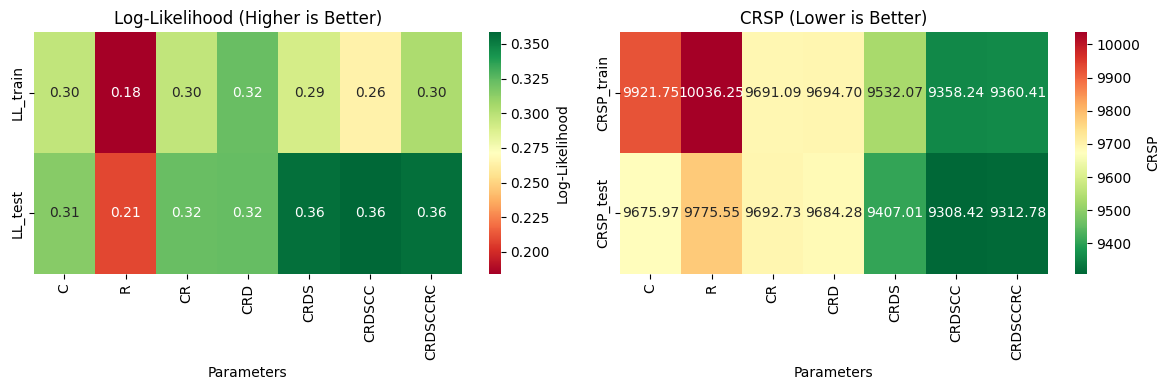

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the data for heatmaps
ll_df = results_df.set_index("Parameters")[["LL_train", "LL_test"]].T.astype(float)
crsp_df = results_df.set_index("Parameters")[["CRSP_train", "CRSP_test"]].T.astype(float)

plt.figure(figsize=(12, 4))

# Heatmap for Log-Likelihood (higher is better, green is good)
plt.subplot(1, 2, 1)
sns.heatmap(ll_df, annot=True, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': 'Log-Likelihood'})
plt.title("Log-Likelihood (Higher is Better)")

# Heatmap for CRSP (lower is better, green is good)
plt.subplot(1, 2, 2)
sns.heatmap(crsp_df, annot=True, fmt=".2f", cmap="RdYlGn_r", cbar_kws={'label': 'CRSP'})
plt.title("CRSP (Lower is Better)")

plt.tight_layout()
plt.show()